# Академия Аналитиков Авито

# Эконометрика

# Экзамен 2023

In [1]:
import pandas as pd

## Задача 1 (40 баллов)

- Итак, у вас есть небольшой датасет `insurance.csv` с затратами на мед. страхование
- Нам интересно посмотреть, что влияет на эти затраты

In [2]:
# Давайте загрузим данные
data = pd.read_csv('/Users/daniilsobolev/Downloads/insurance.csv')

In [3]:
# Посмотрим на него
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- age: возраст

- sex: пол

- bmi: индекс массы тела

- children: кол-во детей, которое покрывает страховка

- smoker: курильщик или нет

- region: регион

- charges: затраты на страховку

In [5]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
data['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [7]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
# У нас есть явно дискретные, в том числе и бинарные, признаки. Давайте сделаем что-нибудь с этим
data = pd.concat([data, pd.get_dummies(data['sex'], drop_first=True, prefix = 'sex')], axis = 1)

data = pd.concat([data, pd.get_dummies(data['region'], drop_first=True, prefix = 'reg')], axis = 1)

data = pd.concat([data, pd.get_dummies(data['smoker'], drop_first=True, prefix = 'sm')], axis = 1)

data = pd.concat([data, pd.get_dummies(data['children'], drop_first=True, prefix = 'ch')], axis = 1)


In [9]:
# del data['sex']
# del data['region']
# del data['smoker']
# del data['children']

In [10]:
data

,age,sex,bmi,children,smoker,region,charges,sex_male,reg_northwest,reg_southeast,reg_southwest,sm_yes,ch_1,ch_2,ch_3,ch_4,ch_5
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1,1,0,0,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,1,0,0,1,0,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,1,0,0,0,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0,0,0,0,0,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,0,0,0,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,1,0,0,0,0,0,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,1,0,0,0,0,0,0


- Переменные преобразованы, теперь можно и порисовать что-нибудь

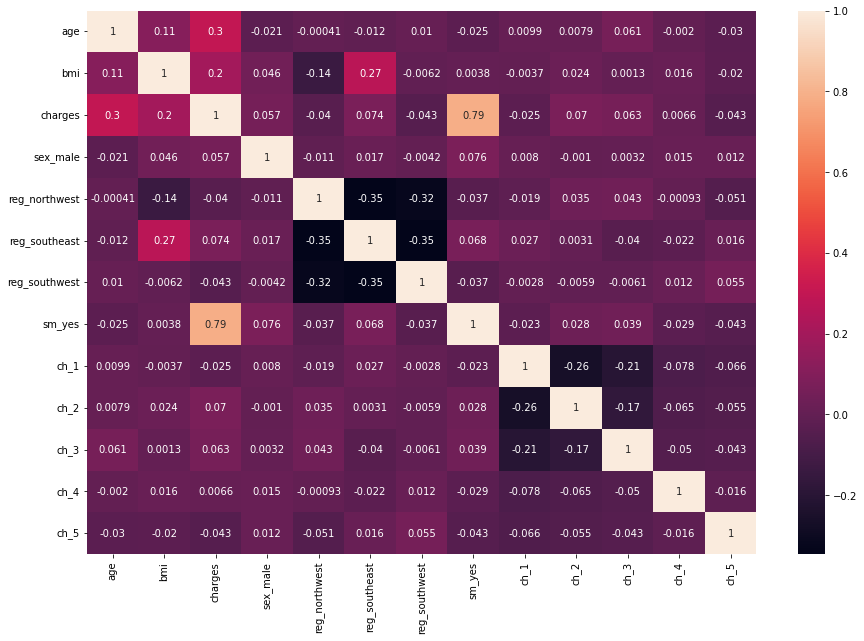

In [11]:
# Начнем с корреляций
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
data_sns = data.drop(columns = ['children'])
sns.heatmap(data_sns.corr(), annot=True)
plt.show()

**Выводы:**


Видим, что есть переменные, которые хорошо по сравнению с другими коррелируют с целевой, напрмиер: age, bmi, sm_yes. 

In [12]:
# Так-так, а что с гистограммами и парными графиками 

def get_info_object(data, column: str, legend: list, search_column='charges') -> None:
    print(data[column].value_counts(normalize=True))
    
    plt.figure(figsize=(12,6))
    for value in legend[:]: 
        data[data[column] == value][search_column].hist(alpha=0.65)

    plt.legend(legend)
    plt.xlabel(f'Затраты на страховку {search_column}')
    plt.ylabel('Количество человек')
    plt.title(f'Частота {column} в зависимости от {search_column}')
    plt.show()

male      0.505232
female    0.494768
Name: sex, dtype: float64


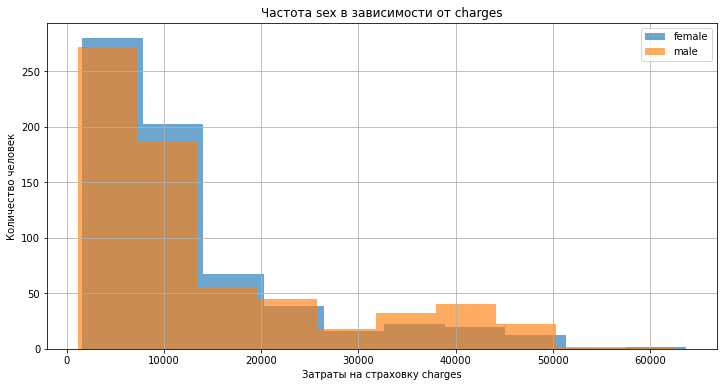

In [13]:
get_info_object(data, 'sex', ['female', 'male'])

Тут видим небольшой бугорок у мужчин на 40_000, у женщин он поменьше, но не факт ,что стат значимо

In [14]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64


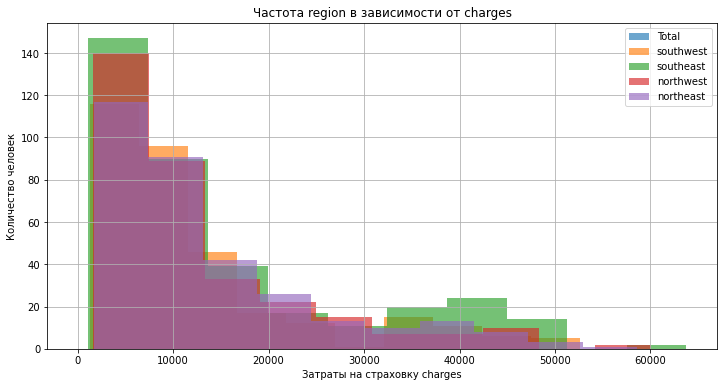

In [15]:
get_info_object(data, 'region', ['Total', 'southwest', 'southeast', 'northwest', 'northeast'])

наблюдаем тот же бугорок на southeast, возможно, есть какая-то отдельная группа - мужчины из southeast

In [16]:
data['children'].unique()

array([0, 1, 3, 2, 5, 4])

0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: children, dtype: float64


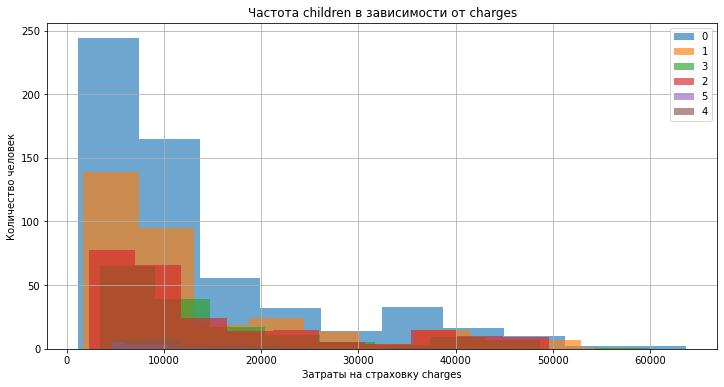

In [17]:
get_info_object(data, 'children', [0, 1, 3, 2, 5, 4])

no     0.795217
yes    0.204783
Name: smoker, dtype: float64


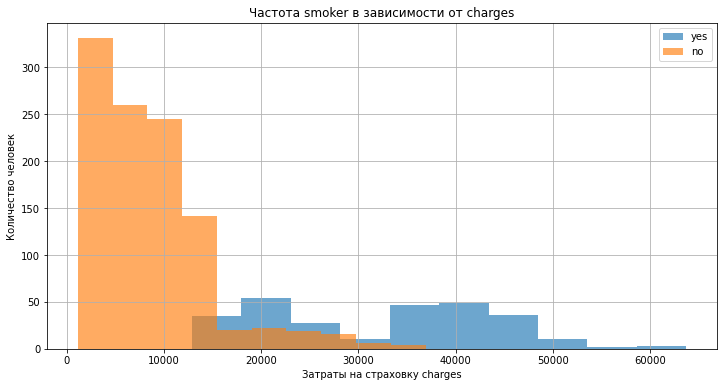

In [18]:
get_info_object(data, 'smoker', ['yes', 'no'])

Тут что-то проглядывается: видимо те люди, кто курят тратят больше на страховку. И опять очень похожий бугорок.

Возможно бугорок, это какая-то отдельная группа, можно будет попытаться её выделить из данных.

In [19]:
def get_info_quantitative(data, column: str, xlable: str, ylable: str, title: str) -> None:
    print(f'mean: {data[column].mean()}')
    print(f'median: {data[column].median()}')
    print(f'min-max: {data[column].min()} - {data[column].max()}')
    
    plt.figure(figsize=(15,15))
    plt.subplot(312)
    sns.distplot(data[column], bins=40)
    
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.title(title)
    plt.show()

In [20]:
def data_dependency(data, column: str, main_column='charges') -> None:
    plt.figure(figsize=(10,10))
    plt.plot(data[column], data['charges'], 'o')

    plt.xlabel(f'{column}', fontsize=10)
    plt.ylabel(f'{main_column}', fontsize=10)
    plt.title(f'Зависимость {main_column} от {column}', fontsize=15)
    plt.show()

In [21]:
data

,age,sex,bmi,children,smoker,region,charges,sex_male,reg_northwest,reg_southeast,reg_southwest,sm_yes,ch_1,ch_2,ch_3,ch_4,ch_5
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1,1,0,0,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,1,0,0,1,0,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,1,0,0,0,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0,0,0,0,0,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,0,0,0,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,1,0,0,0,0,0,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,1,0,0,0,0,0,0


In [22]:
import warnings
warnings.filterwarnings('ignore')

mean: 13270.422265141257
median: 9382.033
min-max: 1121.8739 - 63770.42801


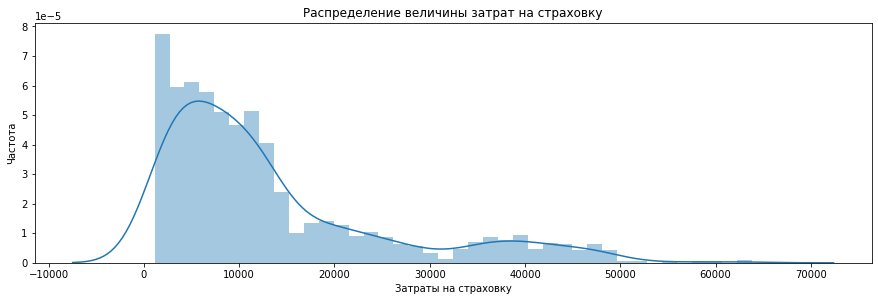

In [23]:
get_info_quantitative(
    data, 
  'charges', 
  'Затраты на страховку', 
  'Частота', 
  'Распределение величины затрат на страховку'
)

mean: 39.20702541106129
median: 39.0
min-max: 18 - 64


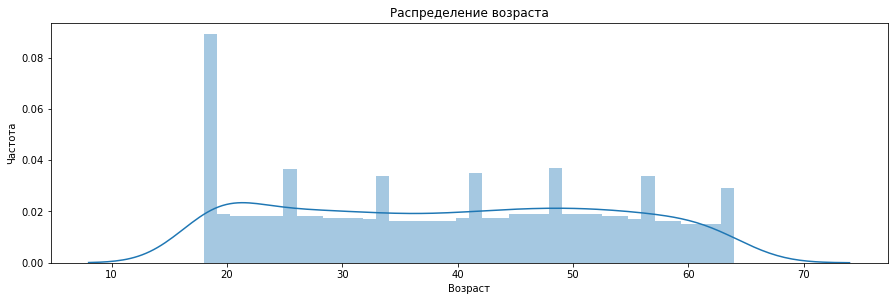

In [24]:
get_info_quantitative(
    data, 
  'age', 
  'Возраст', 
  'Частота', 
  'Распределение возраста'
)

Видны интерсные бугорки, непонятно с чем свзяано, скоррее всего из-за того, что данные искусственно моделированы, "модельер" внес свои интересные зависимости.

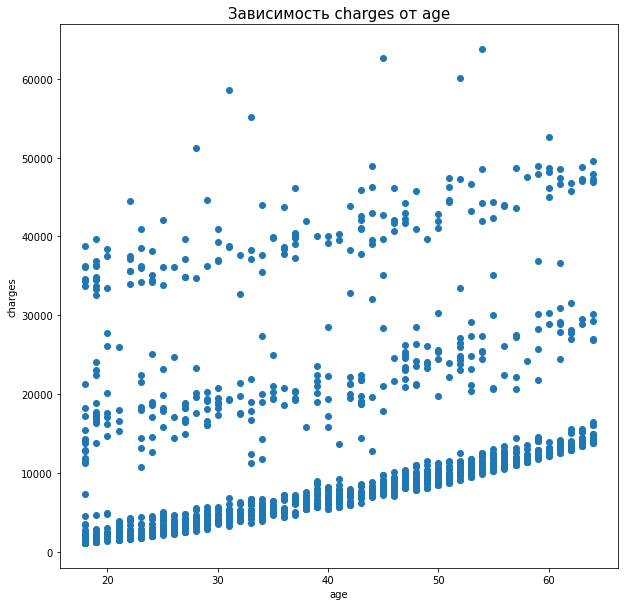

In [25]:
data_dependency(data, 'age')

Тут видим, что тут прорисовываются три линии.

mean: 30.663396860986538
median: 30.4
min-max: 15.96 - 53.13


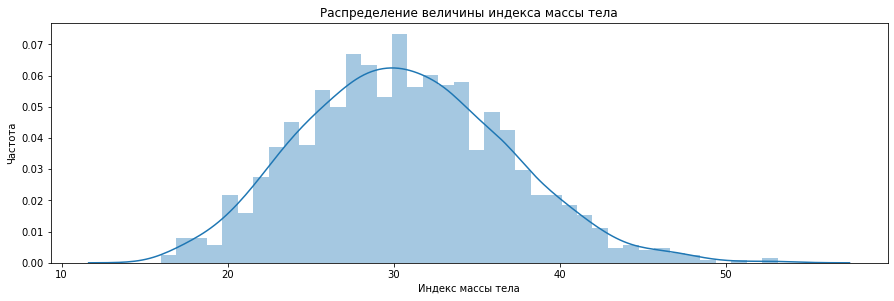

In [26]:
get_info_quantitative(
    data, 
  'bmi', 
  'Индекс массы тела', 
  'Частота', 
  'Распределение величины индекса массы тела'
)

видим что-то очень хорошо распределенное

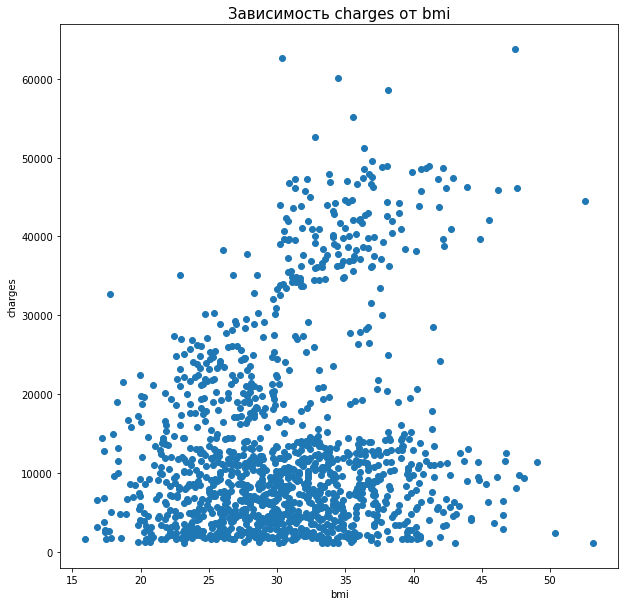

In [27]:
data_dependency(data, 'bmi')

Есть некий положительный наклон 

In [28]:
def get_info_object(data, column: str, legend: list, search_column='charges') -> None:
    data = data[data['smoker'] == 'no']
    print(data[column].value_counts(normalize=True))
    
    plt.figure(figsize=(12,6))
    for value in legend[:]: 
        data[data[column] == value][search_column].hist(alpha=0.65)

    plt.legend(legend)
    plt.xlabel(f'Затраты на страховку {search_column}')
    plt.ylabel('Количество человек')
    plt.title(f'Частота {column} в зависимости от {search_column}')
    plt.show()

female    0.514098
male      0.485902
Name: sex, dtype: float64


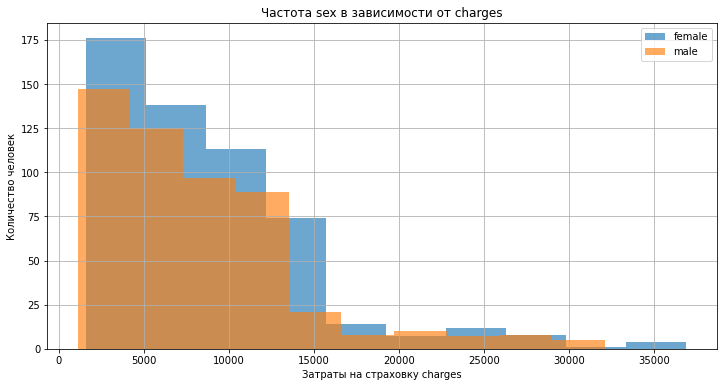

In [29]:
get_info_object(data, 'sex', ['female', 'male'])

southeast    0.256579
northwest    0.250940
southwest    0.250940
northeast    0.241541
Name: region, dtype: float64


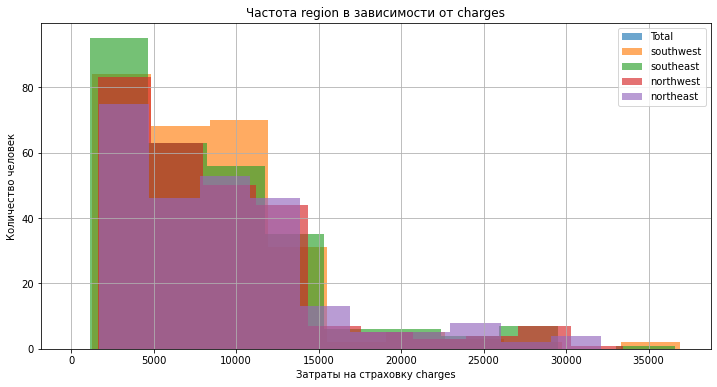

In [30]:
get_info_object(data, 'region', ['Total', 'southwest', 'southeast', 'northwest', 'northeast'])

мы убрали тех людей, кто курит и сразу пропали бугорки, то есть можно сделать гипотезу, что смокеры - это люди из southest и это мужчины

In [31]:
data_help = data[(data['sex'] != 'male') & (data['region'] != 'southeast') & (data['smoker'] != 'yes')]

In [32]:
data_help.shape

(408, 17)

mean: 8872.029537080884
median: 7740.507125
min-max: 1727.785 - 36910.60803


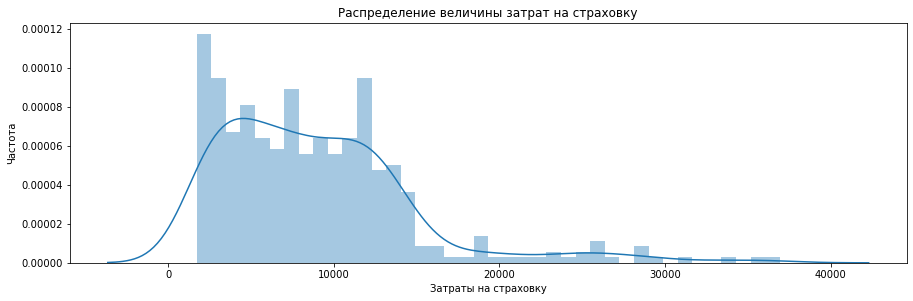

In [33]:
get_info_quantitative(
    data_help, 
  'charges', 
  'Затраты на страховку', 
  'Частота', 
  'Распределение величины затрат на страховку'
)

mean: 39.90196078431372
median: 40.5
min-max: 18 - 64


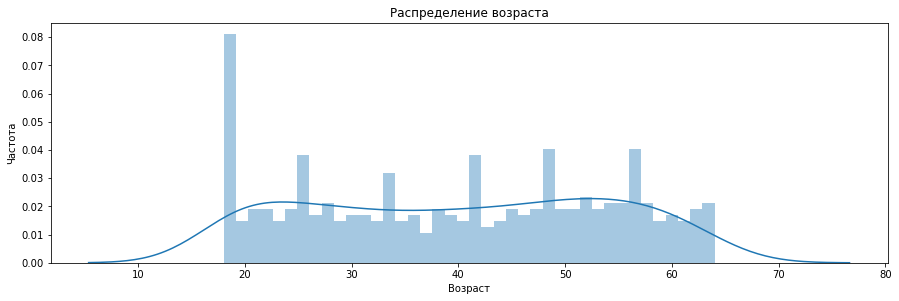

In [34]:
get_info_quantitative(
    data_help, 
  'age', 
  'Возраст', 
  'Частота', 
  'Распределение возраста'
)

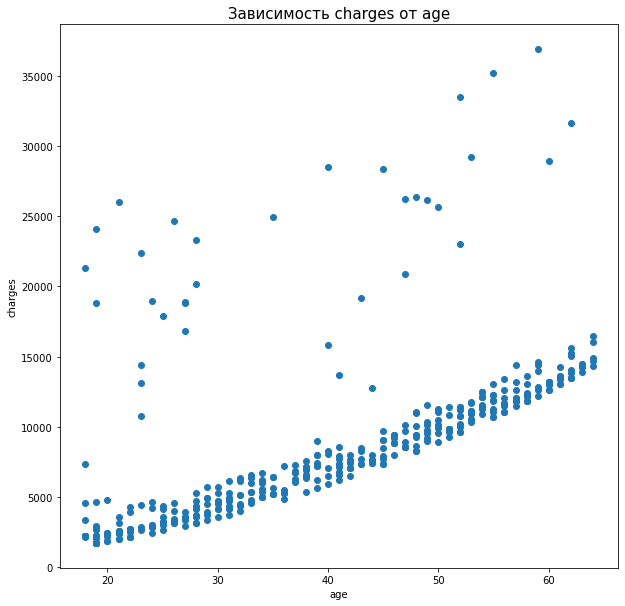

In [35]:
data_dependency(data_help, 'age')

Была попытка выделить отдельную группу, но нужно над этим подольше посидеть ,возмонжо получится, пока непонятно точно ли это стоит делать

In [36]:
import numpy as np

In [37]:
def data_dependency_ln(data, column: str, main_column='charges') -> None:
    plt.figure(figsize=(10,10))
    plt.plot(data[column],np.log(data['charges']), 'o')

    plt.xlabel(f'{column}', fontsize=10)
    plt.ylabel(f'{main_column}', fontsize=10)
    plt.title(f'Зависимость {main_column} от {column}', fontsize=15)
    plt.show()

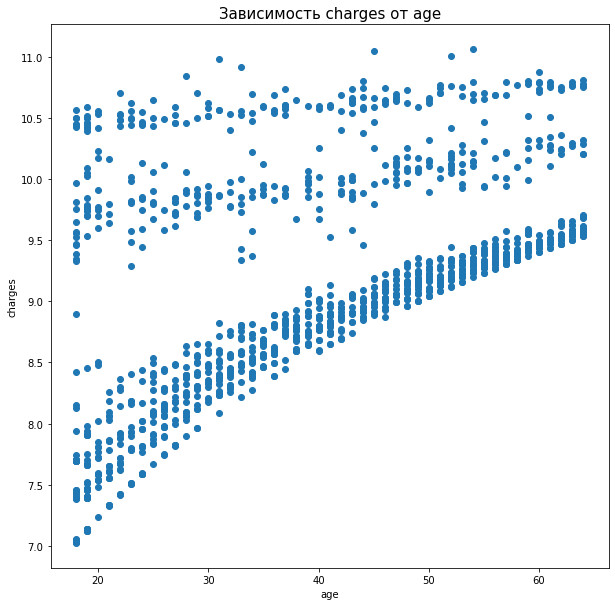

In [38]:
data_dependency_ln(data, 'age')

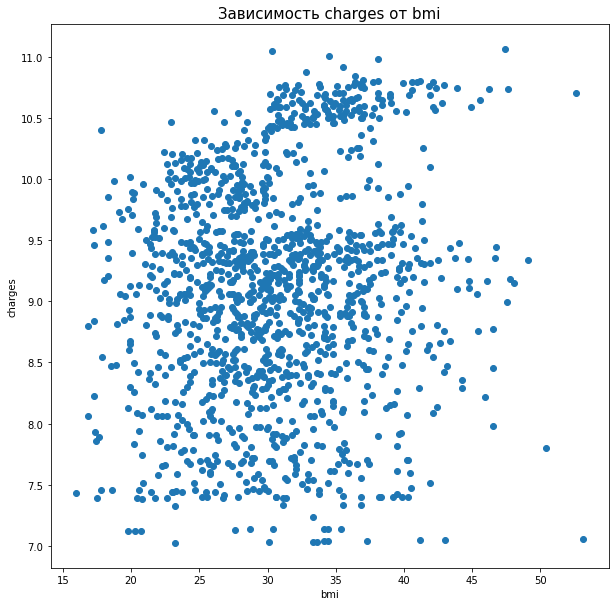

In [39]:
data_dependency_ln(data, 'bmi')

In [40]:
data

,age,sex,bmi,children,smoker,region,charges,sex_male,reg_northwest,reg_southeast,reg_southwest,sm_yes,ch_1,ch_2,ch_3,ch_4,ch_5
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1,1,0,0,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,1,0,0,1,0,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,1,0,0,0,0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,1,1,0,0,0,0,0,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,0,0,0,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,1,0,0,0,0,0,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,1,0,0,0,0,0,0


- Так, пришла пора для регрессии

In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [42]:
# Постройте первую версию модели с теми признаками, которые вы считаете должны быть включены в модель
model = smf.ols(
    'charges ~ age+sex_male+reg_southeast+children+sm_yes+bmi', 
    data = data
)

In [43]:
# Выведите результаты модели
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     666.0
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:45:57   Log-Likelihood:                -13550.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.223e+04    957.856    -12.763      0.000   -1.41e+04   -1.03e+04
age             257.0213     11.908     21.584      0.000     233.661     280.382
sex_male       -129.1911    333.208     -0.388      0.698    -782.861     524.479
reg_southeast  -579.0292    388.509     -1.490      0.136   -1341.185     183.127
children        468.9779    137.841      3.402      0.001     198.569     739.387
sm_yes         2.387e+04    413.326     57.741      0.000    2.31e+04    2.47e+04
bmi             333.9631     28.490     11.722      0.000     278.074     389.853
==============================================================================
Omnibus:                      302.539   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.178
Skew:                           1.219   Prob(JB):                    3.39e-158
Kurtosis:                       5.658   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Регрессия в целом значима, но не все переменные значимы (sex_male, reg_southeast)

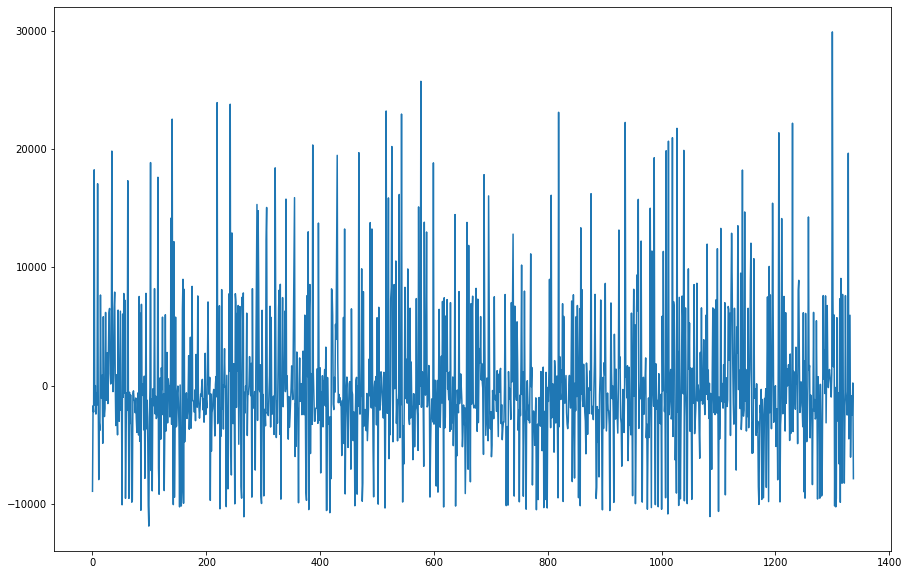

In [44]:
plt.figure(figsize=(15, 10))
plt.plot(model.resid)
plt.show()

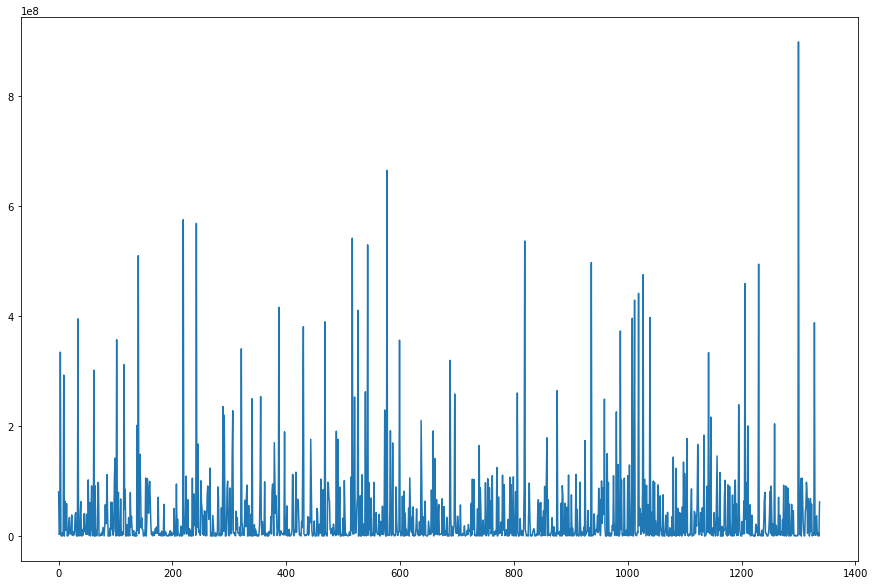

In [45]:
plt.figure(figsize=(15, 10))
plt.plot(model.resid ** 2)
plt.show()

In [46]:
sm.stats.diagnostic.het_white(model.resid, sm.add_constant(data[['age','sex_male','reg_southeast','children','sm_yes','bmi']]))

(133.47143260153118,
 3.635663767275439e-17,
 6.062122412765106,
 3.3724345117527436e-18)

Отврегаем нулевую гипотезу, следовательно, гетерскедастичность в данных имеется, с этим можно далее пробоавть бороться

In [47]:
print(model.get_robustcov_results(cov_type = 'HC0').summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     403.0
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          4.63e-295
Time:                        19:45:58   Log-Likelihood:                -13550.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:                  HC0                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.223e+04   1001.805    -12.203

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
tmp_for_vif = data[['age','sex_male','reg_southeast','children','sm_yes','bmi']]
[variance_inflation_factor(tmp_for_vif.values, i) for i in range(tmp_for_vif.shape[1])]

[7.613741509459124,
 2.00143153474627,
 1.4708302307943761,
 1.8028905510522728,
 1.2611632429597746,
 9.63915105713755]

Мультиколлинеарности не наблюдается

## Задача 2 (40 баллов) 

- Вам надо получить котировки акций какой-то копмпании. Например, Тесла (`TSLA`)
- Можете воспользоваться либо `yfinance`, либо `tsla.csv`. Во втором случае советую применить метод к датафрейму `set_index('Date', drop=True, inplace=True)`

In [50]:
# Получаем данные


In [51]:
# Смотрим на первые строки


In [52]:
# Берем только скорректированную цену закрытия


In [53]:
# Рисуем ее


In [54]:
# Проверям на стационарность


**Вывод:**

In [55]:
# Если вы считаете, что необходимо преобразовать данные, то сделайте это, нарисуйте графики, и проверьте на стационарность


In [56]:
# Нарисуйте ACF, PACF вашего стационарного ряда


- Пришла пора перейти к моделям.
- Используйте AR(1), MA(1) и ARMA(1, 1) модели
- Выведите их результаты и сравните модели по метрике, которой считаете подходящей (объясните, почему вы ее считаете подходящей)

In [57]:
# Не забудьте посмотреть на автокорреляции с помощью теста Льюнга—Бокса


**Выводы:**

- А теперь попробуем найти модель лучше

- Попробуйте поиграться с FBprophet на этих данных

In [58]:
# Попробуйте зафиттить базовую модель


- Что у вас получилось? 
- Что еще можете сказать, скажем, по поводу компонентов модели?

- На занятии вам показывали 100500 параметров, с которыми можно поиграться, чтобы получить "лучшую" модель
- Во-первых, начнем с последнего, какзалось бы, шага. Какую метрику вы будете использовать? Почему?
- Каким именно способом вы будете проводить диагностику модели и сравнивать модели?
- Какие параметры вы будете менять? Почему? Попробуйте предположить, как именно необходимо поменять параметр модели, прежде чем приступать к тестированию. За неверное предположение баллы сниматься не будут при наличии обоснования.
- Как еще можно улучшить модель? Что можно добавить еще?

- А теперь давайте сравним предсказания моделей двух классов.
- Каким тестом воспользуетесь?
- Какие у данного теста есть ограничения?

**Выводы:**

- Покажите финальную модель и сделайте **финальные выводы**


## Задача 3 (20 баллов)

У вас есть датасет с информацией об испанских фирмах, __часть из которых были недавно куплены зарубежными владельцами__. То есть, это фирмы, которые базово имели внутренних владельцев, но часть из них была куплена зарубежными (факт наличия или отсутствия покупки лежит в переменной own). В нём у вас есть такие фичи: 

- id – firm identifier
- own – индикатор владения фирмой (1 если владение изменилось на зарубежное, 0 если владение осталось внутреннее внутреннее; фича, эффект которой нам интересен)
- Llnsales – логарифм продаж в фирме
- Lexport – переменная-индикатор экспорта
- Lavwage – средняя зарплата в компании
- Linnovation – переменная-индикатор того, является ли фирма инновационной
- Llnkapital – логарифм стоимости фирмы (capital stock)
- LsalesGR – Показатель роста продаж ДО влияния (покупки если own = 1 или ничего если own = 0)
- FsalesGR – Показатель роста продаж в результате влияния (интересующая переменная, ПОСЛЕ влияния)

Вы предполагаете, что покупка фирм зарубежными владельцами может вести к росту продаж (за счёт того, что при покупке фирма получает доступ к новым цепочкам поставок или за счёт увеличения цен вследствие роста качества). 

__Задание:__

1. Проверьте эту гипотезу
2. Напишите вывод о том, как влияет покупка фирмы иностранным владельцем на рост продаж

*Опциональные задания не будут влиять на оценку, но помогут вам лучше ответить на вопросы в конце задачи*

In [59]:
# Давайте загрузим данные
df = pd.read_csv('/Users/daniilsobolev/Downloads/spain.csv')

In [60]:
# Посмотрим на них, выведем описательные статистики
df.head()

,id,own,Llnsales,Lexport,Lavwage,Linnovation,Llnkapital,LsalesGR,FsalesGR
0,2.0,0.0,0.428951,1.0,27122.775,0.0,17.280863,0.005022,0.028732
1,3.0,0.0,0.536282,1.0,26643.428,1.0,17.289818,0.107330,0.057262
2,4.0,0.0,0.565014,1.0,26621.950,1.0,17.306300,0.028732,-0.062553
3,5.0,0.0,0.107375,1.0,29072.010,0.0,14.733387,0.000368,-0.101212
4,6.0,0.0,0.219428,0.0,33754.910,0.0,14.689169,0.112053,0.275163


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5142 entries, 0 to 5141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5142 non-null   float64
 1   own          5142 non-null   float64
 2   Llnsales     5142 non-null   float64
 3   Lexport      5142 non-null   float64
 4   Lavwage      5142 non-null   float64
 5   Linnovation  5142 non-null   float64
 6   Llnkapital   5142 non-null   float64
 7   LsalesGR     5142 non-null   float64
 8   FsalesGR     5142 non-null   float64
dtypes: float64(9)
memory usage: 361.7 KB


In [62]:
len(df['id'].unique())

5142

- Посмотрим на графики (heatmap, pairplot, histplot): 

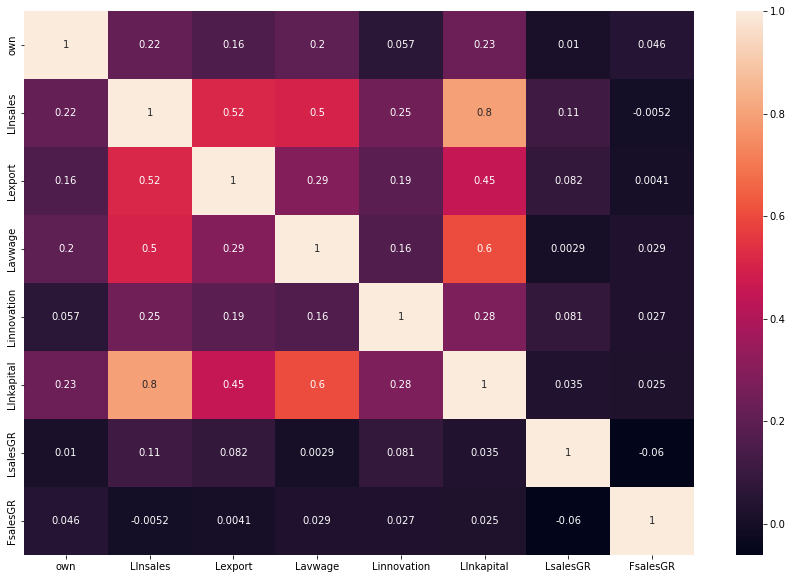

In [63]:
# heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.drop(columns=['id']).corr(), annot=True)
plt.show()

In [64]:
def plot_hist(data, columns):
    for column in columns: 
        plt.figure(figsize=(12,6))
        data[column].hist(alpha=0.7, bins=50)
        data[data['own'] == 1][column].hist(alpha=0.7, bins=50)
        plt.scatter(data[column].mean(), 10, linewidths=15, edgecolors='red', alpha=0.7)
        plt.scatter(data[data['own'] == 1][column].mean(), 10, linewidths=15, edgecolors='green', alpha=0.7)
        plt.legend(['Среднее по всем', 'Среднее по зарубежным', 'Все', 'Зарубежные'])
        plt.title(f'Гистограмма по признаку {column}')
        plt.ylabel('Количество компаний')
        plt.show()

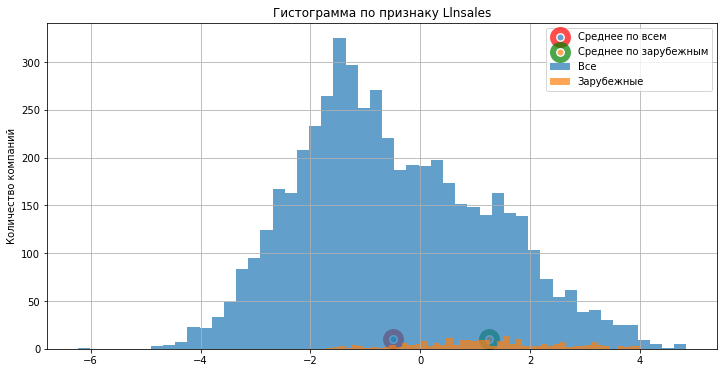

In [65]:
plot_hist(df, ['Llnsales'])

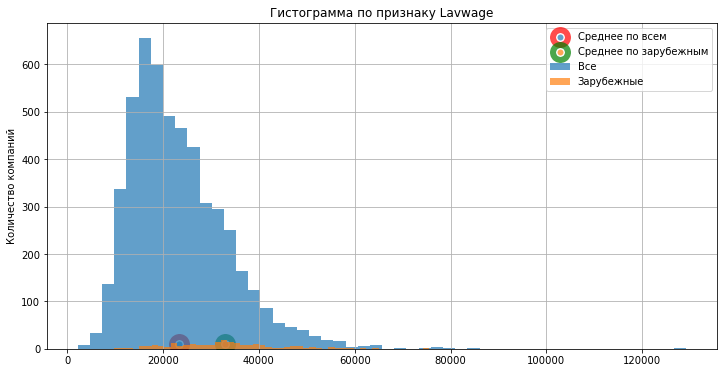

In [66]:
plot_hist(df, ['Lavwage'])

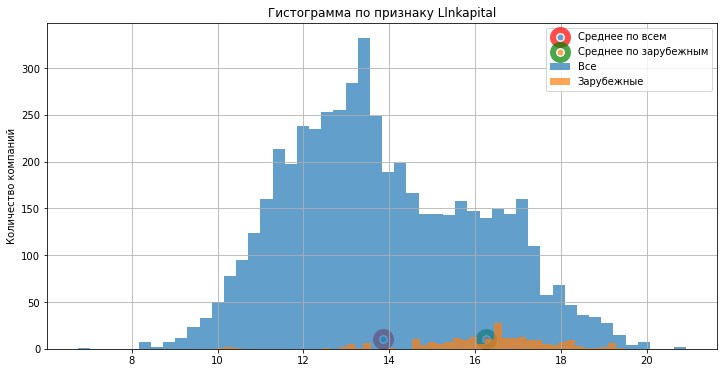

In [67]:
plot_hist(df, ['Llnkapital'])

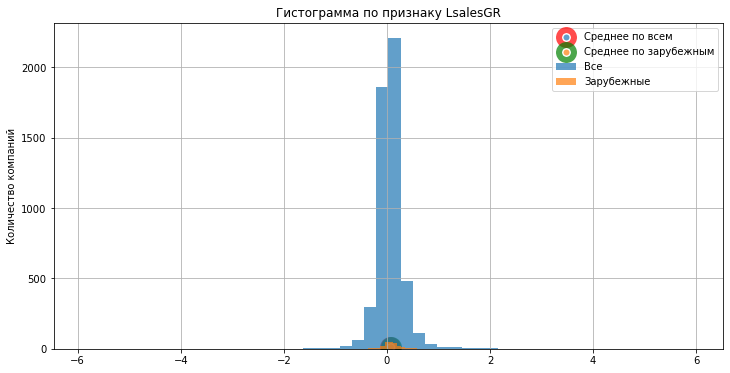

In [68]:
plot_hist(df, ['LsalesGR'])

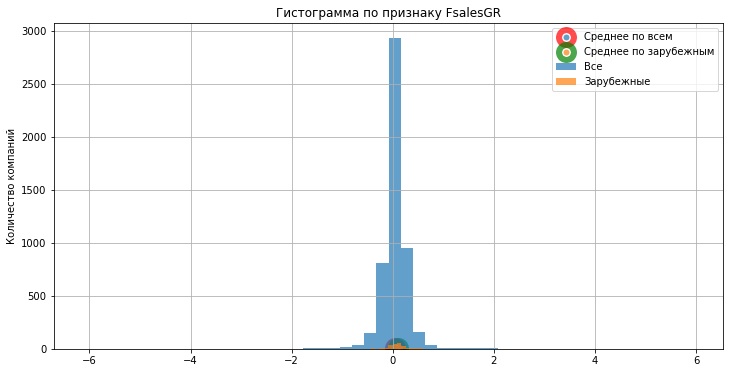

In [69]:
plot_hist(df, ['FsalesGR'])

In [70]:
df['own'].value_counts()

0.0    4916
1.0     226
Name: own, dtype: int64

In [71]:
df['own'].value_counts(normalize=True)

0.0    0.956048
1.0    0.043952
Name: own, dtype: float64

In [72]:
X = df.drop('own', axis=1)
Y = df['own']

In [73]:
logit_mod = sm.Logit(endog=Y, exog=sm.add_constant(X)).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.148698
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    own   No. Observations:                 5142
Model:                          Logit   Df Residuals:                     5133
Method:                           MLE   Df Model:                            8
Date:                Tue, 18 Apr 2023   Pseudo R-squ.:                  0.1753
Time:                        19:46:00   Log-Likelihood:                -764.61
converged:                       True   LL-Null:                       -927.13
Covariance Type:            nonrobust   LLR p-value:                 1.899e-65
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.6312      0.881     -9.799      0.000     -10.357      -6.905
id           8.091e-06   4.62e-05      0.175      0.861   -8.25e-05    9.87e-05
Llnsales        0.1505      0.072      2.078      0.038       0.009       0.292
Lexport         1.1597      0.235      4.935      0.000       0.699       1.620
Lavwage       2.23e-05   6.95e-06      3.207      0.001    8.67e-06    3.59e-05
Linnovation    -0.1183      0.148     -0.801      0.423      -0.408       0.171
Llnkapital      0.2665      0.062      4.308      0.000       0.145       0.388
LsalesGR        0.0342      0.258      0.133      0.895      -0.471       0.539
FsalesGR        0.5957      0.203      2.941      0.003       0.199       0.993
===============================================================================
"""

- Одинаковые ли фирмы до покупки? Есть ли у них разница в стоимости? Есть ли у них разница в темпе роста?

Что будет, если на таких данных просто запустить регрессию? 

In [74]:
# попробуйте запустить обычную регрессию и прокомментируйте результаты: 


- Как можно решить проблему с тем, что фирмы сильно отличаются до покупки? 

In [75]:
# постройте propensity score matching и прокомментируйте результаты (можно как руками, так и пакетно)

In [76]:
# оцените propensity score

In [77]:
# (опционально) посмотрите на маржинальные эффекты переменных на propensity score

In [78]:
# (опционально) нарисуйте, как выглядит распределение propensity score в treatment / control группах

In [79]:
# смэтчите элементы в группах на основе propensity score 

In [80]:
# посчитайте итоговое влияние переменной own на рост продаж после покупки

- Прокомментируйте полученные результаты.
- Сравните результаты с оценками из линейной регрессии. Что изменилось? Как сильно? 

- *(опционально) Подумайте и предложите вариант, как можно было бы провести эксперимент, с помощью которого можно было бы посчитать эффект от покупки фирмы зарубежным владельцем*